<a href="https://colab.research.google.com/github/Arka1212/Live-Class-Monitoring-System-Face-Emotion-Recognition/blob/main/Live_Class_Monitoring_System_(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Class Monitoring System (Face Emotion Recognition)**

## **Project Introduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. 

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

## **Problem Statement**
The problem statement focuses on solving the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions. This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.

## **Dataset Link**
Dataset: https://www.kaggle.com/msambare/fer2013


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [323]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(f'Tensorflow version ----->  {tf.__version__}')

Tensorflow version ----->  2.8.0


In [324]:
# Removing warnings.
import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Imported some of the basic libraries in order to get started & rest all the required libraries will be imported as and when required.

## **Downloading & inspecting dataset**

In [325]:
# Mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [326]:
# Accessing the dataset.
filename = '/content/drive/MyDrive/Capstone Projects/Deep Learning/Live Class Monitoring System (Face Emotion Recognition)/Face Emotion Dataset.zip'

The dataset is actually in 'zip' format and it needs to be unzipped in order to use it.

In [327]:
# Unzipping the dataset.
import zipfile
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

Here, the dataset is already splitted into train & test dataset.

In [328]:
# Walking into the directories and listing the number of files in each directories.
import os

# Walking through the train data directory.
print(f'TRAINING DATA:\n')
for dirpath, dirnames, filenames in os.walk('/content/train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')


# Walking through the test data directory.
print(f'\n\nTESTING DATA:\n')
for dirpath, dirnames, filenames in os.walk('/content/test'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

TRAINING DATA:

There are 7 directories and 0 images in /content/train.
There are 0 directories and 3171 images in /content/train/surprise.
There are 0 directories and 7215 images in /content/train/happy.
There are 0 directories and 4097 images in /content/train/fear.
There are 0 directories and 436 images in /content/train/disgust.
There are 0 directories and 4830 images in /content/train/sad.
There are 0 directories and 4965 images in /content/train/neutral.
There are 0 directories and 3995 images in /content/train/angry.


TESTING DATA:

There are 7 directories and 0 images in /content/test.
There are 0 directories and 831 images in /content/test/surprise.
There are 0 directories and 1774 images in /content/test/happy.
There are 0 directories and 1024 images in /content/test/fear.
There are 0 directories and 111 images in /content/test/disgust.
There are 0 directories and 1247 images in /content/test/sad.
There are 0 directories and 1233 images in /content/test/neutral.
There are 0 

So, basically there are 7 directories present in both train and test dataset which are nothing but the directories representing each class and each directories have a number of images belonging to that class. So, clearly we get an idea that this particular dataset has 7 classes.

In [329]:
# Getting the class names programatically.
import pathlib                                  # 'Pathlib' module in Python provides various classes representing file system paths.

data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
# Creates a list of class names from the sub-directories.

print(class_names)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


Classes present in the dataset are:  
1. **angry**
2. **disgust** 
3. **fear** 
4. **happy**
5. **neutral**
6. **sad** 
7. **surprise**

Each of these classes represents human emotions.

## **Visualising images of each class**

Becoming one with the data by visualising different images of each classes which the dataset in comprised of.

In [330]:
# Creating a function to view random images of each class.
import random
import matplotlib.image as mpimg

def view_random_images(target_directory, target_class):
  
  '''
  Takes into the target directory and target class as a path and prints random images of the specified class from the dataset
  '''
  
  # Creating a target folder which will store the folder path taking the directory name and class name.
  target_folder = target_directory + '/' + target_class
  
  # Getting a random image from the target folder and printing the image number.
  random_image = random.sample(os.listdir(target_folder),1)
  print(f'Image number: {random_image}')

  # Reading the image and plotting it using matploltib.
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class.upper(),fontsize = 15)
  plt.axis('off')
  plt.show()

  # Printing the shape of the image along with the image.
  print(f'Image shape : {img.shape}')
  
  return img

Image number: ['Training_99982465.jpg']


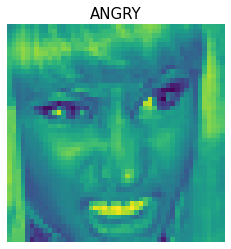

Image shape : (48, 48)


array([[112, 125, 138, ..., 147, 145, 141],
       [119, 134, 149, ..., 147, 144, 135],
       [129, 145, 160, ..., 144, 140, 139],
       ...,
       [147, 172, 169, ..., 129, 134, 134],
       [153, 169, 169, ..., 134, 139, 138],
       [160, 169, 168, ..., 139, 140, 135]], dtype=uint8)

In [331]:
# Viewing 'angry' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'angry')

Image number: ['Training_81867140.jpg']


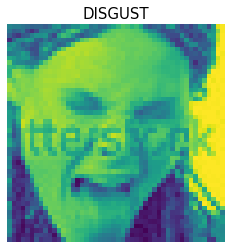

Image shape : (48, 48)


array([[116, 109, 109, ..., 135, 245, 253],
       [100,  79,  85, ..., 134, 212, 253],
       [ 81,  55,  41, ..., 142, 230, 255],
       ...,
       [123,  60,  24, ..., 125, 121, 119],
       [105,  35,  15, ..., 114, 127, 123],
       [ 62,  39,  17, ...,  40, 116, 126]], dtype=uint8)

In [332]:
# Viewing 'disgust' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'disgust')

Image number: ['Training_10942406.jpg']


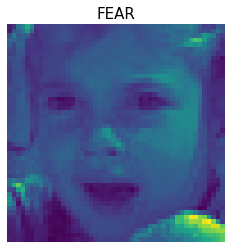

Image shape : (48, 48)


array([[ 15,  22,  58, ...,  27,  43,  41],
       [ 12,  40,  49, ...,  46,  59,  45],
       [ 38,  62,  44, ...,  63,  37,  32],
       ...,
       [ 12,  15,  19, ..., 123, 127, 128],
       [ 12,  14,  17, ..., 106, 109, 115],
       [ 13,  12,  15, ...,  98, 103, 114]], dtype=uint8)

In [333]:
# Viewing 'fear' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'fear')

Image number: ['Training_80837948.jpg']


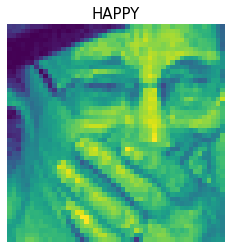

Image shape : (48, 48)


array([[ 36,  32,  36, ..., 112,  81,  63],
       [ 29,  36,  34, ..., 116,  82,  67],
       [ 23,  21,  11, ..., 120,  87,  69],
       ...,
       [113, 122, 136, ...,  90,  96,  88],
       [114, 120, 138, ...,  92, 104,  93],
       [118, 115, 140, ..., 103, 107, 103]], dtype=uint8)

In [334]:
# Viewing 'happy' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'happy')

Image number: ['Training_36159814.jpg']


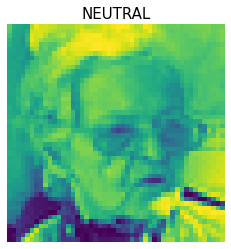

Image shape : (48, 48)


array([[194, 159, 154, ..., 195, 198, 200],
       [189, 156, 151, ..., 195, 200, 205],
       [178, 152, 149, ..., 193, 197, 204],
       ...,
       [  3,   2,  35, ..., 237, 217, 220],
       [  4,  13,  31, ..., 229, 234, 231],
       [  4,   7,  50, ..., 199, 209, 228]], dtype=uint8)

In [335]:
# Viewing 'neutral' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'neutral')

Image number: ['Training_69062237.jpg']


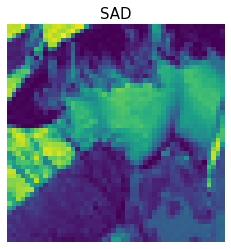

Image shape : (48, 48)


array([[225, 223, 222, ...,   2,   0,   1],
       [223, 234, 223, ...,   0,   2,  17],
       [237, 189,  83, ...,   3,   4,  10],
       ...,
       [ 35,  42,  28, ...,  64,  78,  85],
       [ 34,  20,  35, ...,  58,  76,  85],
       [ 36,  34,  27, ...,  66,  81,  83]], dtype=uint8)

In [336]:
# Viewing 'sad' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'sad')

Image number: ['Training_95989089.jpg']


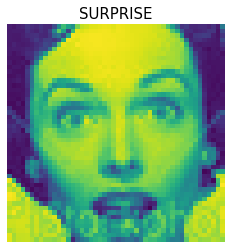

Image shape : (48, 48)


array([[ 31,  26,  33, ...,  45,  28, 107],
       [ 29,  31,  31, ...,  48,  24,  64],
       [ 29,  28,  28, ...,  32,  25,  48],
       ...,
       [220, 226, 232, ..., 219, 211, 237],
       [240, 217, 229, ..., 214, 214, 223],
       [238, 219, 228, ..., 223, 219, 211]], dtype=uint8)

In [337]:
# Viewing 'surprise' class image.
view_random_images(target_directory = '/content/train',
                   target_class = 'surprise')

Points to be noted after viewing the images above:
* Image values are not scaled.
* Images are of shape 48X48.
* Images are not in RGB colour mode.

## **Model building**

Architectures which will be used in order to build models are as follows:
1. **Convolutional Neural Networks (CNN)**
2. **resnet50**
3. **EfficientNetB0**

At first "CNN" will be used to create model followed by transfer learning using "ResNet50", "EfficientNetB0".

Changing the runtime type to "GPU" which is offered by Google Colaboratory in order to train the model faster.

In [338]:
# Checking the GPU details.
!nvidia-smi

Wed May 11 16:32:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   8980MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

So, **Tesla T4** GPU has been allocated by google colab.

### **Custom CNN model**

CNN is a deep learning neural network sketched for processing structured arrays of data such as portrayals or images. CNN are very good at picking up on patterns in the input image, such as lines, gradients, circles or even eyes and faces. 

In [339]:
# Setting up the path to data directories.
train_dir = '/content/train'
test_dir = '/content/test'

In [340]:
# Flipping and scaling the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [341]:
# Getting the train and test(validation) dataset ready for model creation.
train_data = train_datagen.flow_from_directory(directory = train_dir,              
                                               batch_size = 32,                 
                                               target_size = (48, 48),          
                                               color_mode = 'grayscale',                                
                                               class_mode = 'categorical')

test_data = validation_datagen.flow_from_directory(directory = test_dir,              
                                                   batch_size = 32,                 
                                                   target_size = (48, 48),          
                                                   color_mode = 'grayscale',              
                                                   shuffle = False,                  
                                                   class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Data is being pre-processed for CNN and is ready for model building.

In [342]:
# Building a CNN model using the sequential API.
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

model_A = Sequential([
    
    # 1st CNN layer.
    Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1), activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),

    # 2nd CNN layer.
    Conv2D(128, (5,5), padding = 'same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),

    # 3rd CNN layer.
    Conv2D(512, (3,3), padding = 'same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),

    # 4th CNN layer.
    Conv2D(512, (3,3), padding = 'same',activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),

    # Layer to flatten the input layer.
    Flatten(),

    # 1st fully connected layer.
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # 2nd fully connected layer.
    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # Output layer.
    Dense(7, activation = 'softmax')                             # Number of classes = 7.
])

In [343]:
# Compiling the model.
model_A.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.0001),       
                metrics = ['accuracy'])

In [344]:
# Checking the model summary.
model_A.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_82 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_104 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_83 (Bat  (None, 24, 24, 128)    

In [345]:
# Creating callbacks.
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)
# Stops training when a monitored metric has stopped improving.


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)
# Reduces learning rate when a metric stops improving.

In [346]:
# Fitting the model.
history_model_A = model_A.fit_generator(generator = train_data,
                                        epochs = 50,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = test_data.n // test_data.batch_size,
                                        callbacks = [early_stopping, reduce_learningrate]) 

Epoch 1/50
898/898 [==============================] - 21s 22ms/step - loss: 2.2625 - accuracy: 0.2195 - val_loss: 1.9220 - val_accuracy: 0.2885 - lr: 1.0000e-04
Epoch 2/50
898/898 [==============================] - 20s 22ms/step - loss: 1.9565 - accuracy: 0.2833 - val_loss: 1.7954 - val_accuracy: 0.3493 - lr: 1.0000e-04
Epoch 3/50
898/898 [==============================] - 19s 22ms/step - loss: 1.7865 - accuracy: 0.3394 - val_loss: 1.6313 - val_accuracy: 0.3832 - lr: 1.0000e-04
Epoch 4/50
898/898 [==============================] - 19s 21ms/step - loss: 1.6641 - accuracy: 0.3778 - val_loss: 1.5558 - val_accuracy: 0.4252 - lr: 1.0000e-04
Epoch 5/50
898/898 [==============================] - 20s 22ms/step - loss: 1.5510 - accuracy: 0.4170 - val_loss: 1.4244 - val_accuracy: 0.4668 - lr: 1.0000e-04
Epoch 6/50
898/898 [==============================] - 19s 21ms/step - loss: 1.4475 - accuracy: 0.4519 - val_loss: 1.4031 - val_accuracy: 0.4862 - lr: 1.0000e-04
Epoch 7/50
898/898 [==============

In [347]:
# Evaluating model performance on overall test data.
model_A.evaluate(test_data)

225/225 [==============================] - 3s 12ms/step - loss: 1.0745 - accuracy: 0.6115


[1.0744682550430298, 0.6114516854286194]

Accuracy score on overall test dataset came out to be **61.15%**

In [348]:
# Prediction For Test Set
predictions = model_A.predict(test_data)

# Printing Confution Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred = np.argmax(predictions, axis=-1), y_true = test_data.classes)                         
cm

array([[ 564,   20,   95,   53,   75,  130,   21],
       [  31,   57,    7,    4,    2,    7,    3],
       [ 147,    9,  427,   43,   80,  209,  109],
       [  67,    4,   66, 1459,   71,   61,   46],
       [ 137,    4,  105,  111,  631,  218,   27],
       [ 170,   11,  170,  100,  167,  607,   22],
       [  22,    3,   82,   42,   20,   18,  644]])

<Figure size 432x288 with 0 Axes>

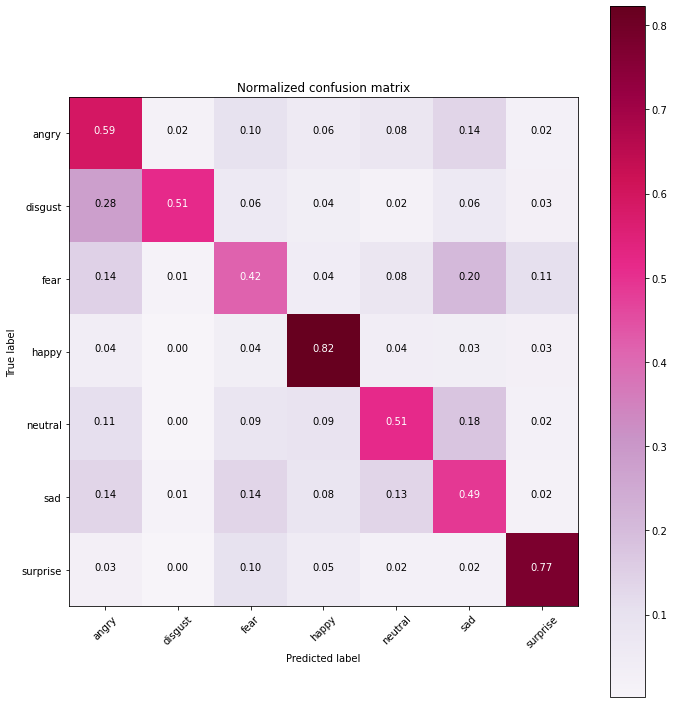

In [349]:
# Computing predictions.
predictions = model_A.predict_generator(generator=test_data)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_data.classes
class_names = test_data.class_indices.keys()


# Creating function to plot confusion matrix.
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap = plt.cm.PuRd):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
# Compute confusion matrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plotting normalized confusion matrix.
plt.figure()
plot_confusion_matrix(cnf_matrix,  classes = class_names, title='Normalized confusion matrix')
plt.show()

This CNN model does a good job in predicting the happy & surprised faces while the model predicts the fear & disgust faces quite poorly.

In [350]:
# Creating a function to plot the validation and training curves separately.
def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation set
  '''
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # PLotting loss.
  plt.plot(epochs, loss, label = 'training_loss',linewidth=3)
  plt.plot(epochs, val_loss, label = 'val_loss',linewidth=3)
  plt.title('LOSS CURVE',fontsize = 25)
  plt.legend()
  plt.grid()
  plt.show()

  # Plotting accuracy.
  plt.figure()                                                             
  plt.plot(epochs, accuracy, label = 'training_accuracy',linewidth=3)
  plt.plot(epochs, val_accuracy, label = 'val_accuracy',linewidth=3)
  plt.title('ACCURACY',fontsize = 25)
  plt.legend()
  plt.grid()
  plt.show()

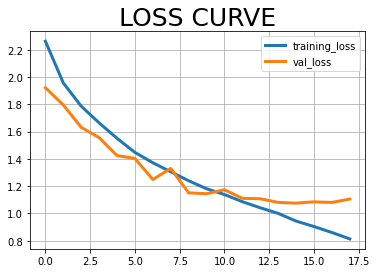

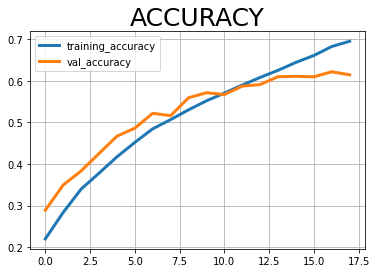

In [351]:
# Plotting the loss curves.
plot_loss_curves(history_model_A)

**The training gave the accuracy of 69.55% and val_accuracy of 61.15%. The model performed better than average.**

### **ResNet50**

ResNet50 is a pre-trained convolutional nerual network that is 50 layers deep(48 Convolution layers along with 1 MaxPool and 1 Average Pool layer). A residual neural network (ResNet) is an artificial neural network (ANN) of a kind that stacks residual blocks on top of each other to form a network.

In [352]:
# ResNet is trained on RGB images and we have grascaled images so converting colour mode to RGB.
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   rescale=1./255)
validation_datagen = ImageDataGenerator(horizontal_flip=True,
                                        brightness_range=[0.8,1.2],
                                        rescale=1./255)

In [353]:
# Getting the train and test(validation) dataset ready for 'ResNet50' model creation.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (48,48),
                                               batch_size = 32,
                                               shuffle = True,
                                               color_mode ='rgb',
                                               class_mode ='categorical')

test_data = validation_datagen.flow_from_directory(test_dir,
                                                   target_size = (48,48),
                                                   batch_size = 32,
                                                   shuffle = False,
                                                   color_mode ='rgb',
                                                   class_mode ='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


As, the data is pre-processed, so its ready for ResNet50 model creation.

In [354]:
# Creating a base model using pre-trained ResNet architecture.
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.trainable = False

In [366]:
# Checking the base model summary.
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [355]:
# Freezing all layers of the architecture except the last 4 layers.
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [356]:
# Creating the model.
from tensorflow.keras.layers import Input

model_B = Sequential([
                      
   # Adding the pre-trained model layers.                  
   base_model,
   Dropout(0.2),
   Flatten(),
   BatchNormalization(),

   # 1st fully connected layer.
   Dense(512, kernel_initializer = 'he_normal', activation = 'relu'),
   BatchNormalization(),
   Dropout(0.25),

   # 2nd fully connected layer.
   Dense(256, kernel_initializer = 'he_normal', activation = 'relu'),
   BatchNormalization(),
   Dropout(0.25),

   # Output layer.
   Dense(7, activation='softmax')
])

In [357]:
# Compiling the model.
model_B.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.001),          # Default learning rate.
                metrics = ['accuracy'])

In [358]:
# Model summary.
model_B.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_110 (Dropout)       (None, 2, 2, 2048)        0         
                                                                 
 flatten_21 (Flatten)        (None, 8192)              0         
                                                                 
 batch_normalization_88 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_62 (Dense)            (None, 512)               4194816   
                                                                 
 batch_normalization_89 (Bat  (None, 512)              2048      
 chNormalization)                                    

In [359]:
# Creating callbacks.
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)
# Stops training when a monitored metric has stopped improving.


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=10, 
                              min_lr=0.00001, 
                              mode='auto')
# Reduces learning rate when a metric stops improving.

In [360]:
# Fitting the model.
history_model_B = model_B.fit_generator(generator = train_data,
                                        epochs = 50,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = test_data.n // test_data.batch_size,
                                        callbacks = [early_stopping, reduce_lr])

Epoch 1/50
898/898 [==============================] - 36s 37ms/step - loss: 1.9552 - accuracy: 0.2563 - val_loss: 1.7363 - val_accuracy: 0.3147 - lr: 0.0010
Epoch 2/50
898/898 [==============================] - 33s 37ms/step - loss: 1.7624 - accuracy: 0.2967 - val_loss: 1.7069 - val_accuracy: 0.3189 - lr: 0.0010
Epoch 3/50
898/898 [==============================] - 32s 35ms/step - loss: 1.7268 - accuracy: 0.3067 - val_loss: 1.6784 - val_accuracy: 0.3347 - lr: 0.0010
Epoch 4/50
898/898 [==============================] - 32s 36ms/step - loss: 1.7063 - accuracy: 0.3138 - val_loss: 1.6783 - val_accuracy: 0.3396 - lr: 0.0010
Epoch 5/50
898/898 [==============================] - 37s 41ms/step - loss: 1.6982 - accuracy: 0.3166 - val_loss: 1.7027 - val_accuracy: 0.3357 - lr: 0.0010
Epoch 6/50
898/898 [==============================] - 32s 36ms/step - loss: 1.6956 - accuracy: 0.3216 - val_loss: 1.6790 - val_accuracy: 0.3426 - lr: 0.0010
Epoch 7/50
898/898 [==============================] - 32s 

In [361]:
# Evaluating on the overall test data.
model_B.evaluate(test_data)

225/225 [==============================] - 7s 29ms/step - loss: 1.5968 - accuracy: 0.3838


[1.596751093864441, 0.3838116526603699]

Accuracy score on overall test dataset came out to be **38.38%**

In [362]:
# Prediction for test set.
predictions_1 = model_B.predict(test_data)

# Printing Confution Matrix
cm_1 = confusion_matrix(y_pred = np.argmax(predictions_1, axis=-1), y_true = test_data.classes)                         
cm_1

array([[ 203,    2,   40,  361,  132,  173,   47],
       [  16,    8,    7,   46,   14,   14,    6],
       [  91,    1,  146,  338,  151,  194,  103],
       [  80,    2,   53, 1235,  169,  185,   50],
       [  82,    2,   54,  457,  413,  177,   48],
       [ 119,    1,   70,  430,  193,  393,   41],
       [  48,    0,   77,  180,   95,   66,  365]])

In [363]:
# Computing predictions.
predictions_1 = model_B.predict_generator(generator=test_data)
y_pred = [np.argmax(probas) for probas in predictions_1]
y_test = test_data.classes
class_names = test_data.class_indices.keys()

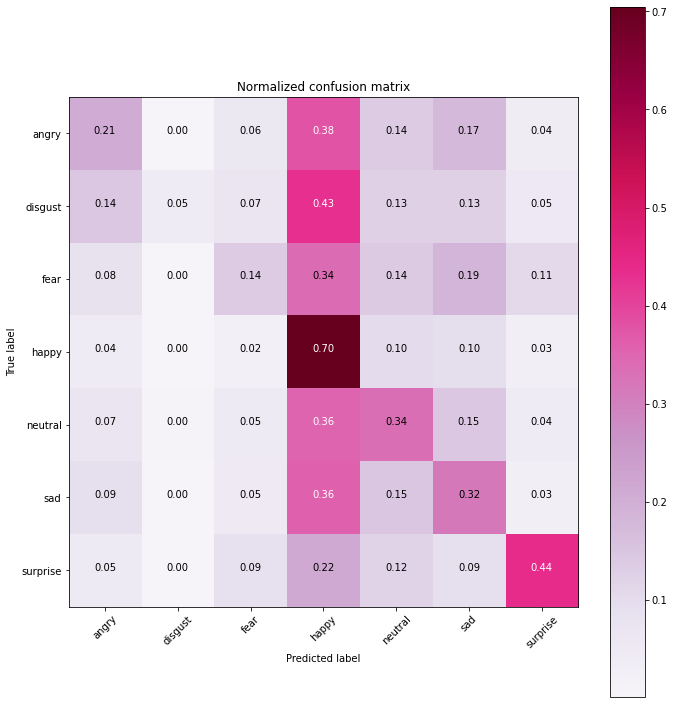

In [364]:
# Computing confusion matrix.
cnf_matrix_1 = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plotting the confusion matrix.
plot_confusion_matrix(cnf_matrix_1,  classes = class_names, title='Normalized confusion matrix')

Clearly, model is predicting each class to be as 'happy' class. Indicates the poor performance of the model.

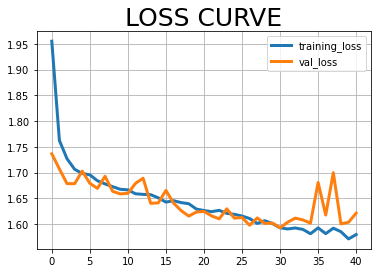

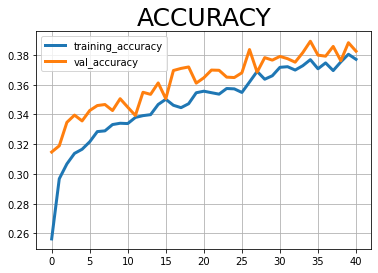

In [365]:
# Plotting the loss curves.
plot_loss_curves(history_model_B)

**The training gave the accuracy of 37.71% and val_accuracy of 38.38%. The 'ResNet50' model failed to perform well and the accuracy scores are also not at all satisfactory.**